# Homework 3

## Problem 1: Feature Detection

### Imports

In [1]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt

import util
from util.corner_detection import HarrisCornerDetector

DATA_PATH = "./AlignmentTwoViews/*"

In [2]:
# optional: allow Jupyter to "hot reload" the Python modules I wrote, to avoid restarting the kernel after every change
%load_ext autoreload
%autoreload 2

### Part A: Harris Corner Detector

#### Image 1

In [3]:
img_paths = glob.glob(DATA_PATH)

In [4]:
img_paths

['./AlignmentTwoViews/uttower_right.jpg',
 './AlignmentTwoViews/uttower_left.jpg']

In [5]:
img1 = util.load_image(img_paths[0], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024


In [6]:
corner_detector = HarrisCornerDetector()
response = corner_detector.detect_features(img1)

Let's just double check the properties of this `response` variable:

In [6]:
type(response)

numpy.ndarray

In [7]:
response.shape

(683, 1024)

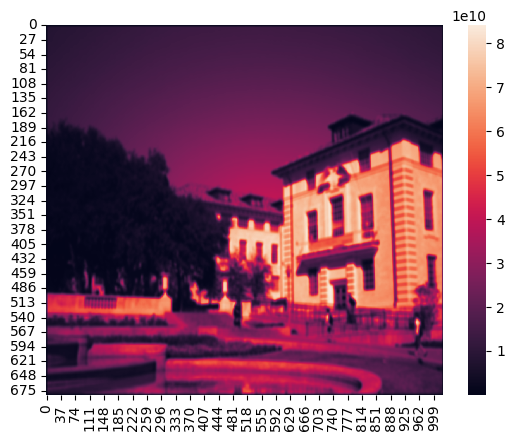

In [8]:
sns.heatmap(response)  # just playing around, this is not my solution image
plt.show()

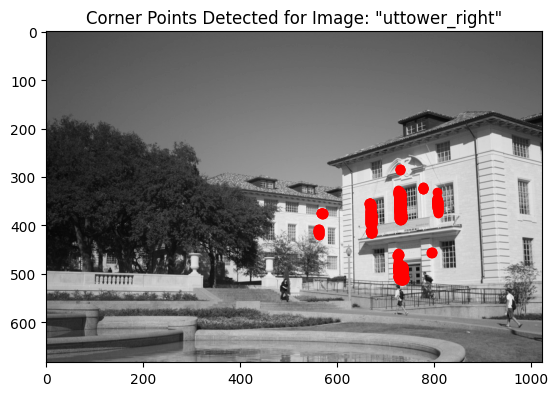

In [12]:
HarrisCornerDetector.execute_and_visualize(
    img1, "uttower_right",
    use_non_max_suppression=False,
)

#### Image 2

In [5]:
img2 = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


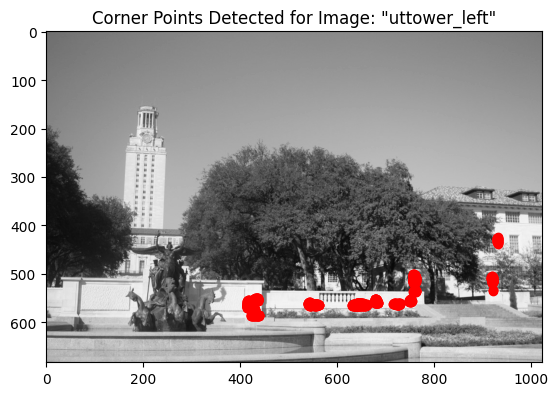

In [17]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=False,
)

### Part B: Leveraging Non-Maximum Suppression

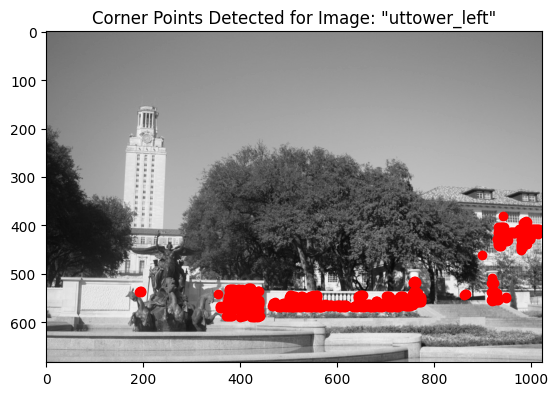

In [6]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=True,
)

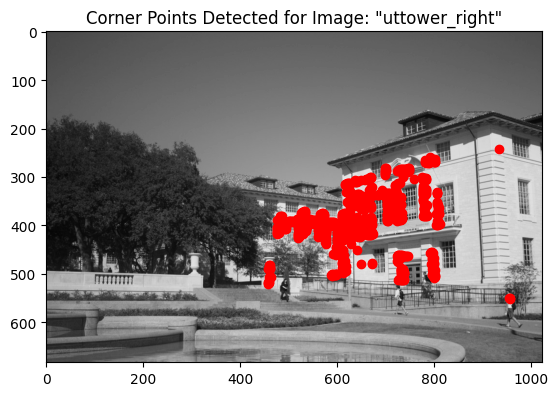

In [9]:
HarrisCornerDetector.execute_and_visualize(
    img1,
    "uttower_right",
    use_non_max_suppression=True,
)

### Part C: Patch Similarity Measures

In [3]:
from util.ops import SimilarityMeasure

For convenience, let's recompute the features for both images (in case the cells above haven't been run):

In [4]:
corner_detector = HarrisCornerDetector()

In [5]:
img_paths = glob.glob(DATA_PATH)
right_img = util.load_image(img_paths[0], return_array=True)
left_img = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024
Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


#### Similarity Measure: Cosine Similarity 

For this part, I'm choosing to go with the cosine similarity to measure the correspondence between different points in the two images.

Cosine similarity is a popular metric, and it is fast to compute (just like the SSD or NCC measures). But there are also other advantages that make it useful for this problem:
- it is scale-invariant
- and robust to outliers

Truthfully, for our use case these advantages may not entirely be required. But we'll use it nonetheless, as it's arguably a useful default.

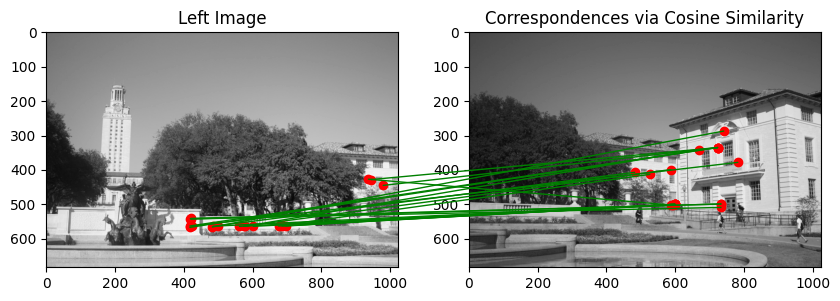

In [8]:
HarrisCornerDetector.visualize_correspondences(
    left_img,
    right_img,
    plot_title="Correspondences via Cosine Similarity",
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.COS,
)

#### Discussion: SSD vs. NCC?

As per the homework description, it's worth also exploring other similarity measures like the sum of squared differences (abbreviated SSD, aka the Euclidean distance) and normalized cross correlation (abbreviated NCC).

In general, there are some noteworthy differences between these two:
- SSD represents the straight-line distance between two points in a given vector space, while NCC measures the linear relationship between functions (as measured by the distribution of their output values, which can be stored in vectors).
- NCC is normalized, so it is better at being scale-variant (but that probably doesn't matter in our use case anyway). 
- SSD can be skewed more easily in the presence of outliers (but that shouldn't really matter here, as our measure is being computed with just two vectors).
- as we can see below, the correspondences found when using NCC tend to concentrate more along one area of the left image. This might not indicate a shortcoming with the metric itself though - it could be an issue with my implementation, which zero-pads the patches (when they go outside the image bounds). Although this sounds like an acceptable idea in theory, in practice it is possible that it "dilutes" the similarity measure, which throws off our feature matching. 
- so overall, the correspondences found by SSD were the best in this case - indicating that for simple matching problems like ours, it is perfectly acceptable. 

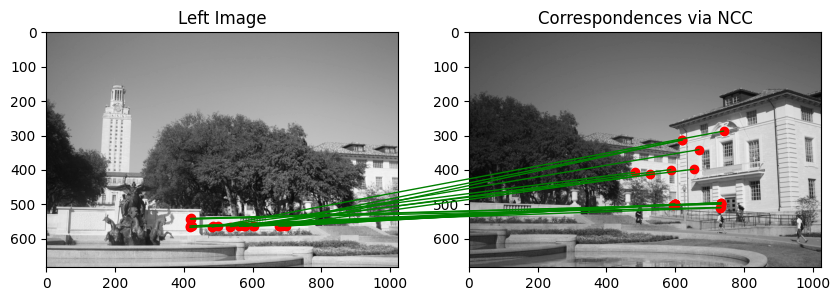

In [7]:
HarrisCornerDetector.visualize_correspondences(
    left_img,
    right_img,
    plot_title="Correspondences via NCC",
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.NCC,
)

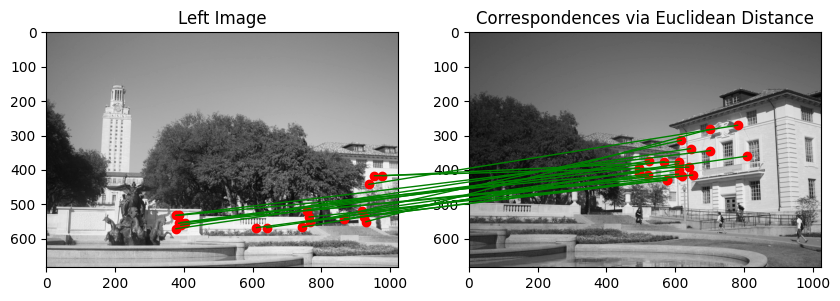

In [6]:
HarrisCornerDetector.visualize_correspondences(
    left_img,
    right_img,
    plot_title="Correspondences via Euclidean Distance",
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.SSD,
)